In [3]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
data = pd.read_csv('reliance.csv')
data.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,23-Aug-2024,EQ,"3,007.50","3,022.65","2,996.85","2,996.25","2,996.85","2,999.95","3,007.21","3,217.60","2,220.30","46,24,827","13,90,78,42,193.30","1,68,002"
1,22-Aug-2024,EQ,"3,006.00","3,013.00","2,981.30","2,997.35","2,996.50","2,996.25","2,994.88","3,217.60","2,220.30","52,22,891","15,64,19,35,953.20","2,33,216"
2,21-Aug-2024,EQ,"2,986.50","3,015.75","2,980.00","2,991.90","2,999.00","2,997.35","3,001.42","3,217.60","2,220.30","38,84,998","11,66,05,26,038.60","1,41,353"
3,20-Aug-2024,EQ,"2,994.45","3,007.85","2,980.05","2,976.80","2,986.50","2,991.90","2,996.98","3,217.60","2,220.30","42,05,904","12,60,50,24,714.40","1,75,516"
4,19-Aug-2024,EQ,"2,965.00","2,996.60","2,961.00","2,956.40","2,979.00","2,976.80","2,980.25","3,217.60","2,220.30","68,98,871","20,56,03,27,724.60","2,00,328"


In [22]:
data.columns

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
count,246,246,246,246,246,246,246,246,246,246,246,246,246,246
unique,246,1,227,241,237,244,234,244,246,24,13,246,246,246
top,23-Aug-2024,EQ,"2,921.50","2,944.00","2,912.00","2,929.65","2,925.00","2,929.65","3,007.21","2,630.95","2,220.30","46,24,827","13,90,78,42,193.30","1,68,002"
freq,1,246,3,2,3,2,3,2,1,87,206,1,1,1


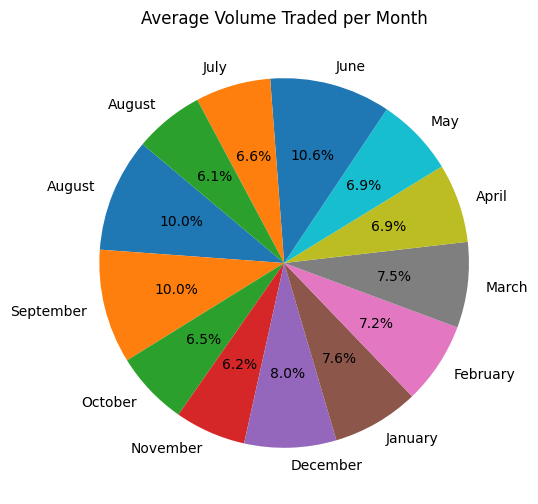

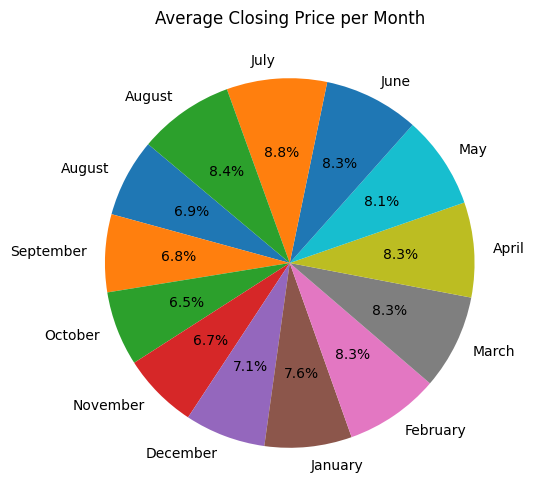

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date ' column to datetime format
data['Date '] = pd.to_datetime(data['Date '])

# Cleaning 'VOLUME ' and 'close ' columns to remove commas and convert them to numeric
data['VOLUME '] = data['VOLUME '].str.replace(',', '').astype(float)
data['close '] = data['close '].str.replace(',', '').astype(float)

# Extracting the month and year from the 'Date ' column
data['Month'] = data['Date '].dt.month
data['Year'] = data['Date '].dt.year

# Grouping by 'Year' and 'Month' to calculate the average 'VOLUME ' and 'close '
monthly_avg = data.groupby(['Year', 'Month']).agg({'VOLUME ': 'mean', 'close ': 'mean'}).reset_index()

# Mapping month numbers to month names for better readability in the pie chart
monthly_avg['Month'] = monthly_avg['Month'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# Creating a pie chart for average volume traded per month
plt.figure(figsize=(8, 6))
plt.pie(monthly_avg['VOLUME '], labels=monthly_avg['Month'], autopct='%1.1f%%', startangle=140)
plt.title('Average Volume Traded per Month')
plt.show()

# Creating a pie chart for average closing price per month
plt.figure(figsize=(8, 6))
plt.pie(monthly_avg['close '], labels=monthly_avg['Month'], autopct='%1.1f%%', startangle=140)
plt.title('Average Closing Price per Month')
plt.show()


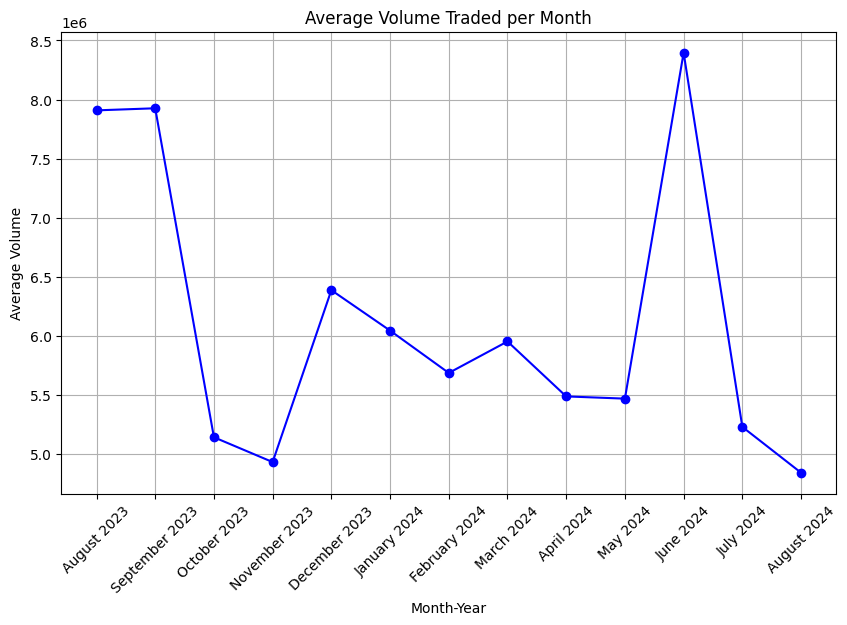

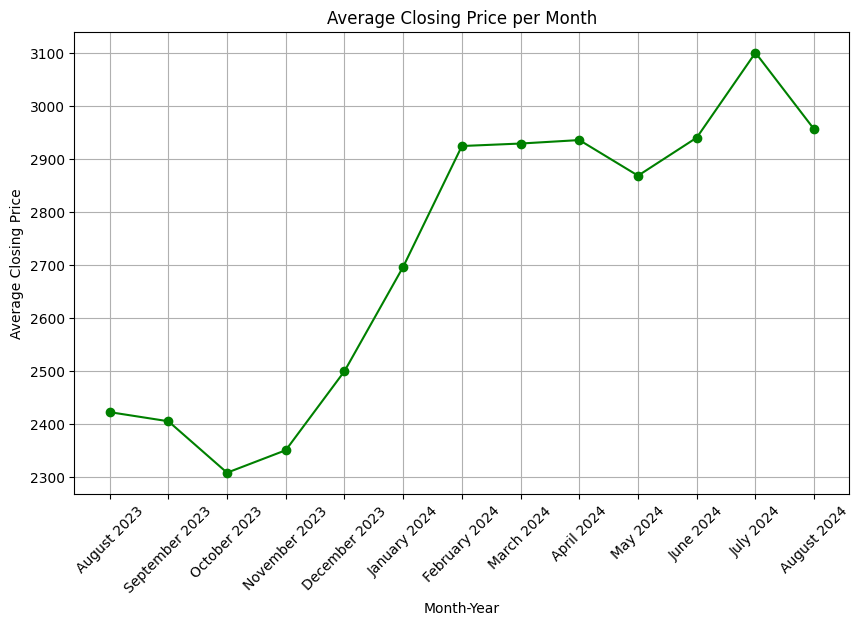

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it has a 'Date ' column along with 'VOLUME ' and 'close '
# Converting the 'Date ' column to datetime format
data['Date '] = pd.to_datetime(data['Date '])

# Ensure 'VOLUME ' and 'close ' columns are treated as strings before replacing commas and converting to float
data['VOLUME '] = pd.to_numeric(data['VOLUME '].astype(str).str.replace(',', ''), errors='coerce')
data['close '] = pd.to_numeric(data['close '].astype(str).str.replace(',', ''), errors='coerce')

# Extracting the month and year from the 'Date ' column
data['Month'] = data['Date '].dt.month
data['Year'] = data['Date '].dt.year

# Grouping by 'Year' and 'Month' to calculate the average 'VOLUME ' and 'close '
monthly_avg = data.groupby(['Year', 'Month']).agg({'VOLUME ': 'mean', 'close ': 'mean'}).reset_index()

# Sorting by Year and Month to ensure the graph is in chronological order
monthly_avg.sort_values(['Year', 'Month'], inplace=True)

# Mapping month numbers to month names for better readability in the graph
monthly_avg['Month'] = monthly_avg['Month'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# Creating a line graph for average volume traded per month
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg['Month'] + ' ' + monthly_avg['Year'].astype(str), monthly_avg['VOLUME '], marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.title('Average Volume Traded per Month')
plt.xlabel('Month-Year')
plt.ylabel('Average Volume')
plt.grid(True)
plt.show()

# Creating a line graph for average closing price per month
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg['Month'] + ' ' + monthly_avg['Year'].astype(str), monthly_avg['close '], marker='o', linestyle='-', color='g')
plt.xticks(rotation=45)
plt.title('Average Closing Price per Month')
plt.xlabel('Month-Year')
plt.ylabel('Average Closing Price')
plt.grid(True)
plt.show()


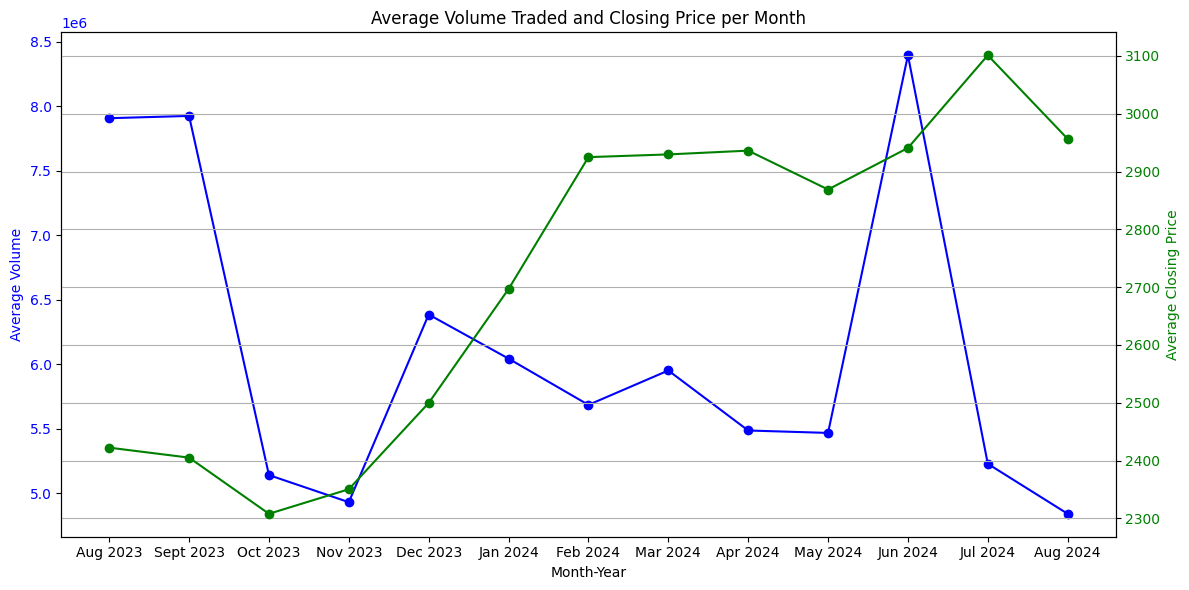

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it has a 'Date ' column along with 'VOLUME ' and 'close '
# Converting the 'Date ' column to datetime format
data['Date '] = pd.to_datetime(data['Date '])

# Ensure 'VOLUME ' and 'close ' columns are treated as strings before replacing commas and converting to float
data['VOLUME '] = pd.to_numeric(data['VOLUME '].astype(str).str.replace(',', ''), errors='coerce')
data['close '] = pd.to_numeric(data['close '].astype(str).str.replace(',', ''), errors='coerce')

# Extracting the month and year from the 'Date ' column
data['Month'] = data['Date '].dt.month
data['Year'] = data['Date '].dt.year

# Grouping by 'Year' and 'Month' to calculate the average 'VOLUME ' and 'close '
monthly_avg = data.groupby(['Year', 'Month']).agg({'VOLUME ': 'mean', 'close ': 'mean'}).reset_index()

# Sorting by Year and Month to ensure the graph is in chronological order
monthly_avg.sort_values(['Year', 'Month'], inplace=True)

# Mapping month numbers to month names for better readability in the graph
monthly_avg['Month'] = monthly_avg['Month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 
    6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 
    11: 'Nov', 12: 'Dec'
})

# Creating a combined line graph with dual y-axes for average volume and closing price
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the average volume on the left y-axis
ax1.plot(monthly_avg['Month'] + ' ' + monthly_avg['Year'].astype(str), 
         monthly_avg['VOLUME '], marker='o', linestyle='-', color='b', label='Average Volume')
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Average Volume', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a second y-axis for the closing price
ax2 = ax1.twinx()
ax2.plot(monthly_avg['Month'] + ' ' + monthly_avg['Year'].astype(str), 
         monthly_avg['close '], marker='o', linestyle='-', color='g', label='Average Closing Price')
ax2.set_ylabel('Average Closing Price', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Adding a title and grid to the plot
plt.title('Average Volume Traded and Closing Price per Month')
plt.xticks(rotation=45)
fig.tight_layout()
plt.grid(True)

plt.show()


In [15]:
data.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades ', 'Month', 'Year'],
      dtype='object')

In [3]:
#1. Time Series Analysis

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date ' column is in datetime format
data['Date '] = pd.to_datetime(data['Date '])

# Remove commas and convert to float for necessary columns
numeric_columns = ['OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ', 'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', ''), errors='coerce')

# Extracting the month and year from the 'Date ' column
data['Month'] = data['Date '].dt.month
data['Year'] = data['Date '].dt.year

# Creating a dictionary to hold data for each month
monthly_data = {}
for (year, month), group in data.groupby(['Year', 'Month']):
    monthly_data[(year, month)] = group


In [12]:
def plot_closing_price(df, year, month):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date '], df['close '], label='Closing Price', color='blue')
    plt.title(f'Closing Price for {month}-{year}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_moving_averages(df, year, month):
    # Check if the DataFrame has enough data for moving average calculations
    if len(df) >= 200:
        df['50_MA'] = df['close '].rolling(window=50).mean()
        df['200_MA'] = df['close '].rolling(window=200).mean()
        
        plt.figure(figsize=(12, 6))
        plt.plot(df['Date '], df['close '], label='Closing Price', color='blue')
        plt.plot(df['Date '], df['50_MA'], label='50-Day MA', color='orange')
        plt.plot(df['Date '], df['200_MA'], label='200-Day MA', color='green')
        plt.title(f'Stock Price with Moving Averages for {month}-{year}')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.grid(True)
        plt.legend()
        plt.show()
    else:
        print(f"Not enough data to calculate moving averages for {month}-{year}")

def calculate_rsi(df, window=14):
    delta = df['close '].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def plot_rsi(df, year, month):
    df['RSI'] = calculate_rsi(df, 14)
    
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date '], df['RSI'], label='RSI', color='red')
    plt.axhline(70, color='black', linestyle='--', linewidth=0.7)
    plt.axhline(30, color='black', linestyle='--', linewidth=0.7)
    plt.title(f'Relative Strength Index (RSI) for {month}-{year}')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_volume(df, year, month):
    plt.figure(figsize=(12, 6))
    plt.bar(df['Date '], df['VOLUME '], label='Volume', color='skyblue')
    plt.title(f'Trading Volume for {month}-{year}')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)
    plt.legend()
    plt.show()


In [14]:
# # Mapping month numbers to month names for better readability in titles
# month_name = {
#     1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
#     6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 
#     11: 'November', 12: 'December'
# }

# # Perform analysis for each month
# for (year, month), df in monthly_data.items():
#     print(f"\nAnalyzing {month_name[month]} {year}")
#     plot_closing_price(df, year, month)
#     plot_moving_averages(df, year, month)
#     plot_rsi(df, year, month)
#     plot_volume(df, year, month)



Analyzing January 2024


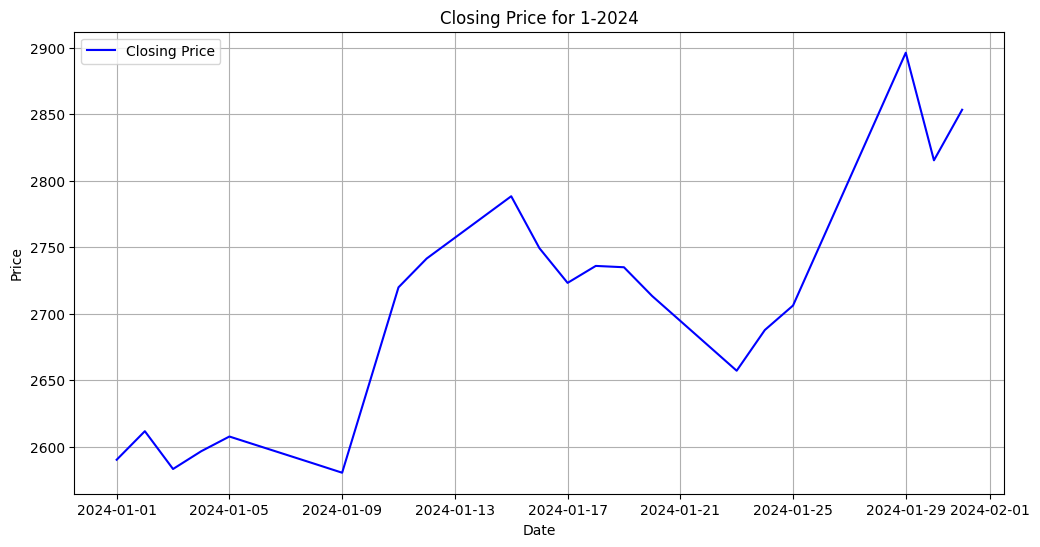

Not enough data to calculate moving averages for 1-2024


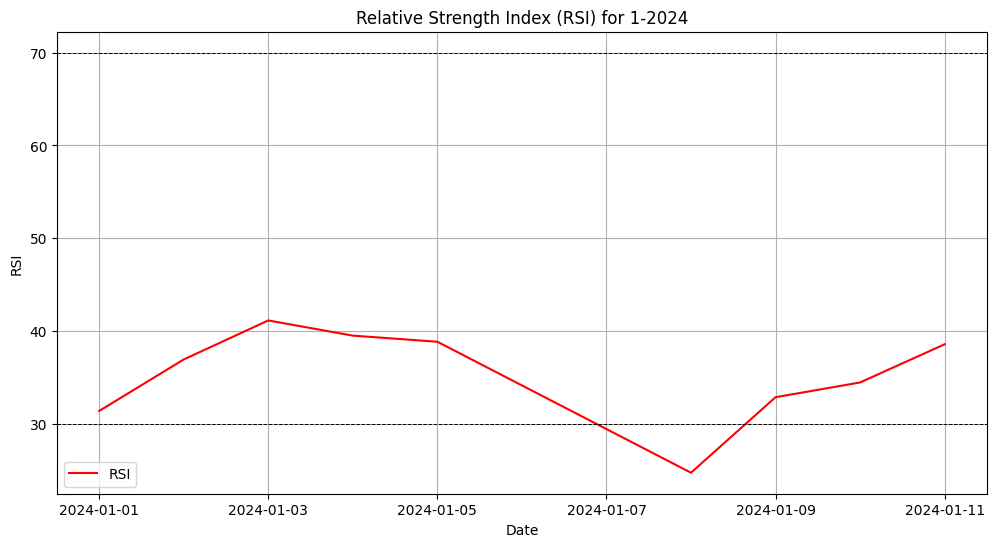

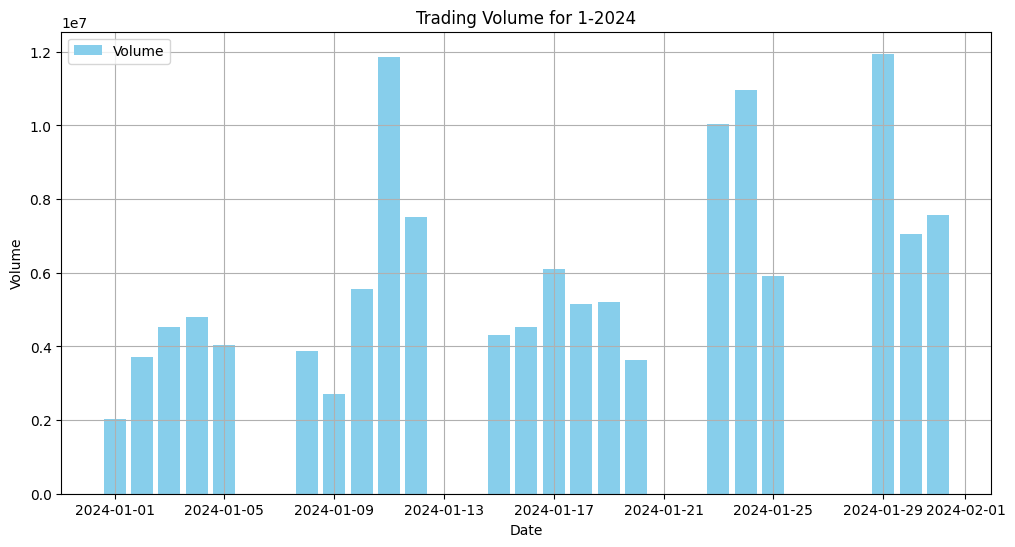

In [15]:
# Filtering data for January 2024
january_2024_data = monthly_data[(2024, 1)]

print("\nAnalyzing January 2024")
plot_closing_price(january_2024_data, 2024, 1)
plot_moving_averages(january_2024_data, 2024, 1)
plot_rsi(january_2024_data, 2024, 1)
plot_volume(january_2024_data, 2024, 1)



Analyzing February 2024


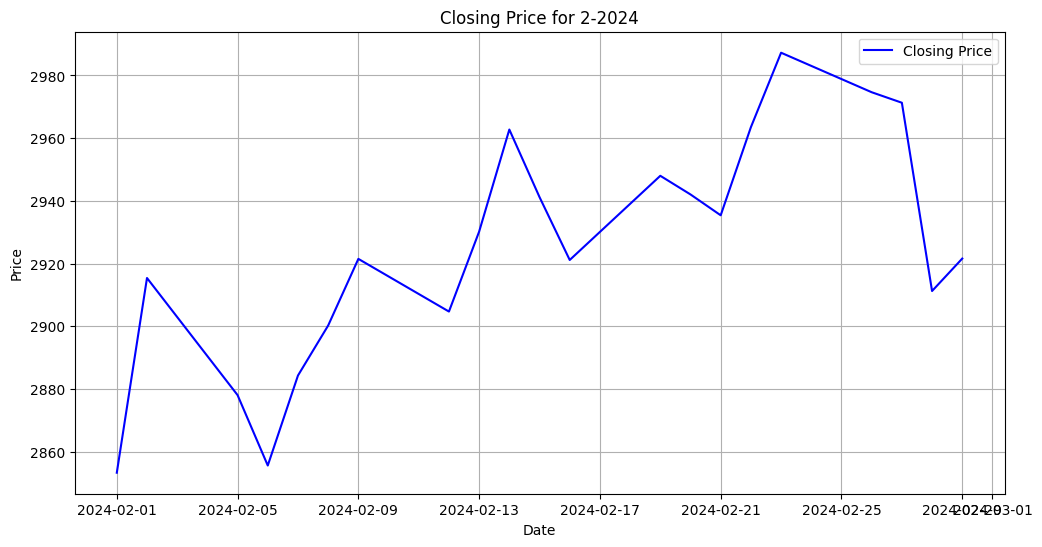

Not enough data to calculate moving averages for 2-2024


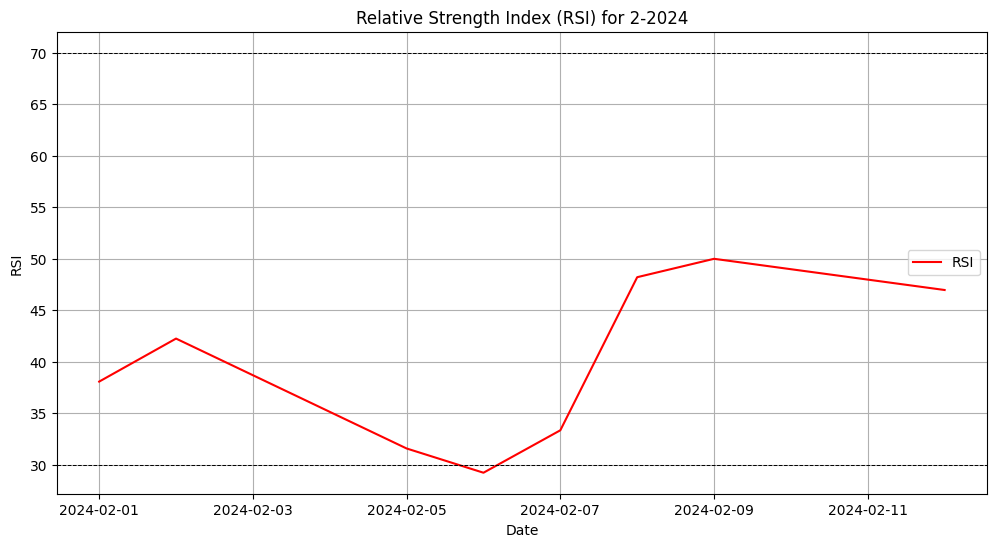

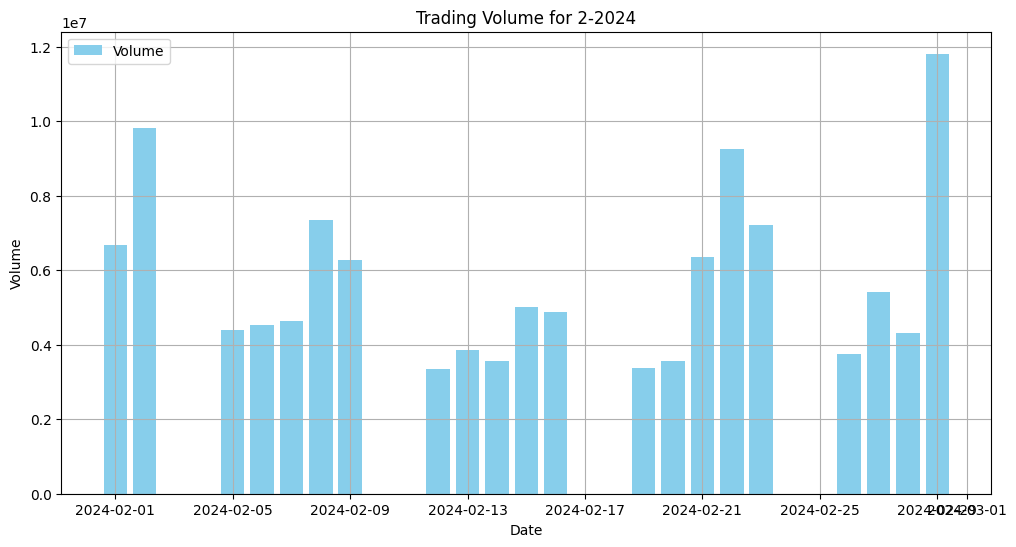

In [16]:
# Filtering data for February 2024
february_2024_data = monthly_data[(2024, 2)]

print("\nAnalyzing February 2024")
plot_closing_price(february_2024_data, 2024, 2)
plot_moving_averages(february_2024_data, 2024, 2)
plot_rsi(february_2024_data, 2024, 2)
plot_volume(february_2024_data, 2024, 2)



Analyzing March 2024


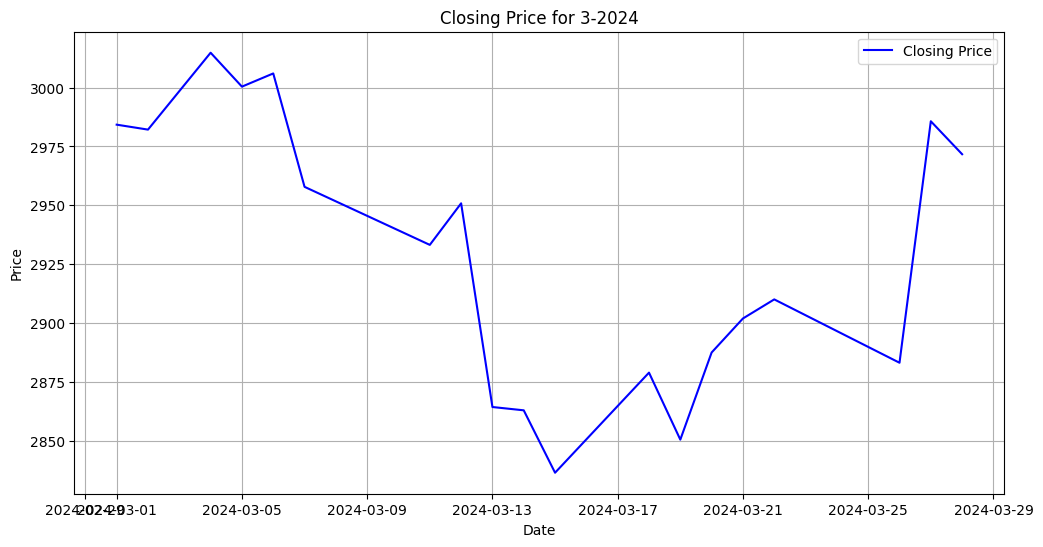

Not enough data to calculate moving averages for 3-2024


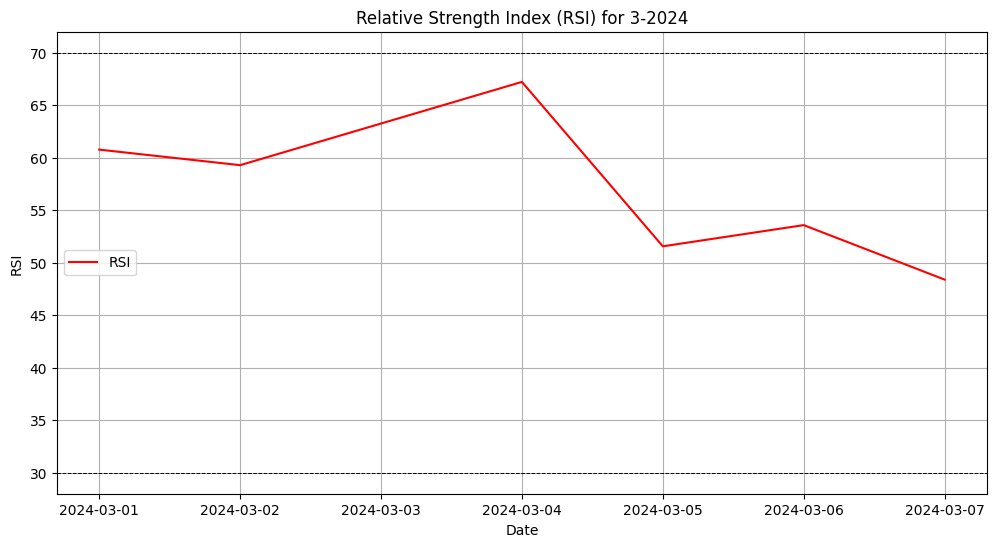

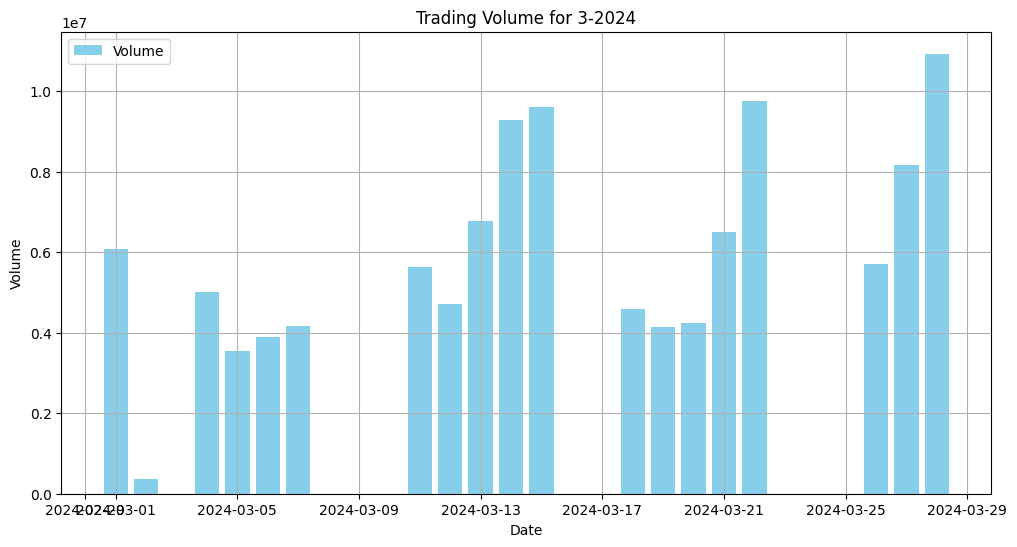

In [17]:
# Filtering data for March 2024
march_2024_data = monthly_data[(2024, 3)]

print("\nAnalyzing March 2024")
plot_closing_price(march_2024_data, 2024, 3)
plot_moving_averages(march_2024_data, 2024, 3)
plot_rsi(march_2024_data, 2024, 3)
plot_volume(march_2024_data, 2024, 3)



Analyzing May 2024


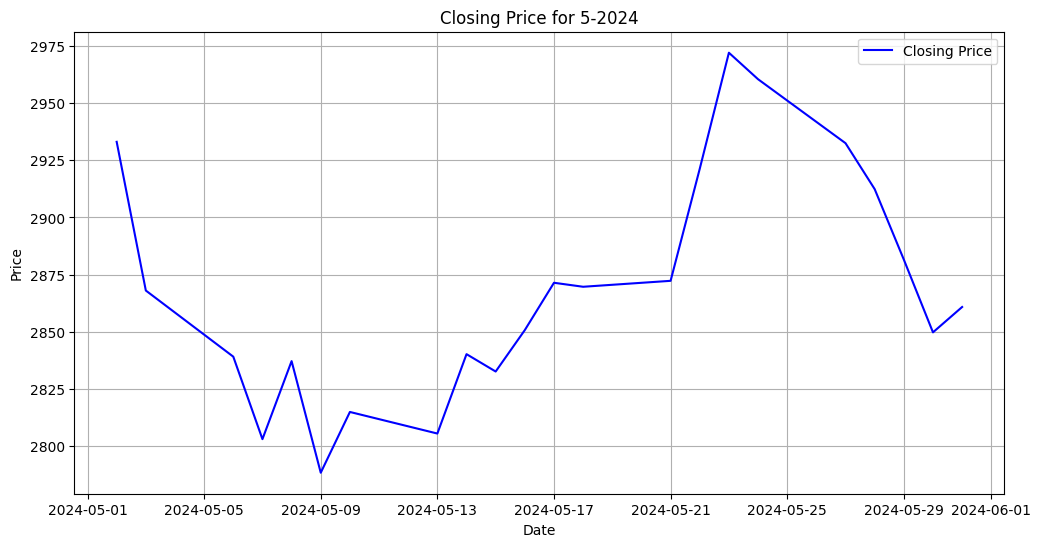

Not enough data to calculate moving averages for 5-2024


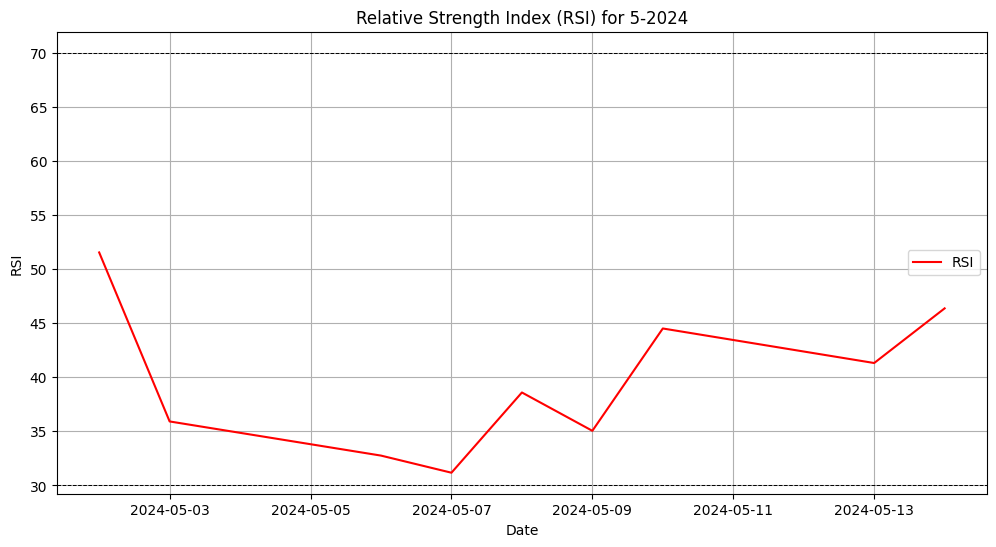

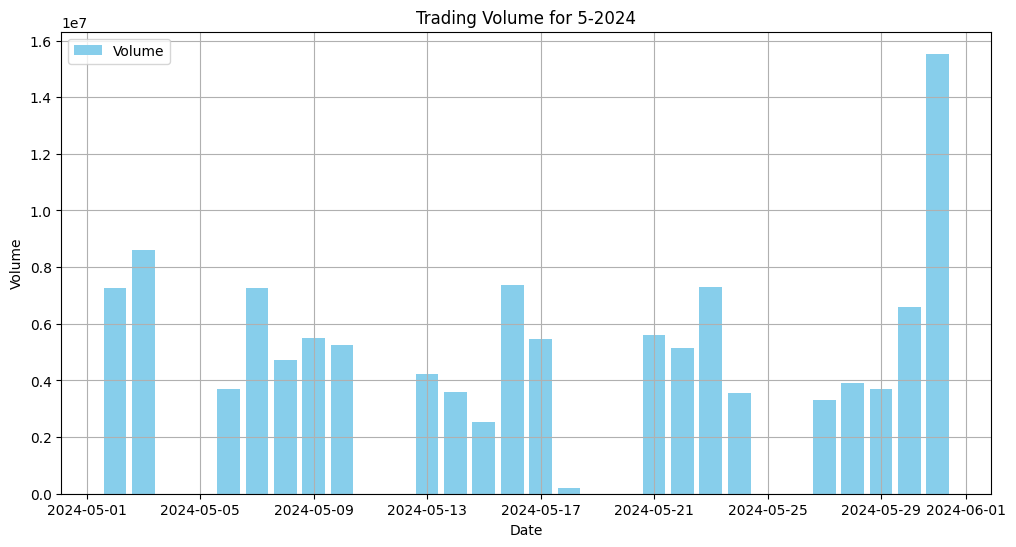

In [18]:
# Filtering data for May 2024
may_2024_data = monthly_data[(2024, 5)]

print("\nAnalyzing May 2024")
plot_closing_price(may_2024_data, 2024, 5)
plot_moving_averages(may_2024_data, 2024, 5)
plot_rsi(may_2024_data, 2024, 5)
plot_volume(may_2024_data, 2024, 5)


In [19]:
# To perform this analysis for other months and years, just replace the year and month in the
# monthly_data[(year, month)] and adjust the print statement to reflect the correct month and year.

In [ ]:
# Mapping month numbers to month names for better readability in titles
# month_name = {
#     1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
#     6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 
#     11: 'November', 12: 'December'
# }

# # Perform analysis for each month
# for (year, month), df in monthly_data.items():
#     print(f"\nAnalyzing {month_name[month]} {year}")
#     plot_closing_price(df, year, month)
#     plot_moving_averages(df, year, month)
#     plot_rsi(df, year, month)
#     plot_volume(df, year, month)


In [23]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Convert necessary columns to numeric if they are not already
data['OPEN '] = pd.to_numeric(data['OPEN '].astype(str).str.replace(',', ''), errors='coerce')
data['HIGH '] = pd.to_numeric(data['HIGH '].astype(str).str.replace(',', ''), errors='coerce')
data['LOW '] = pd.to_numeric(data['LOW '].astype(str).str.replace(',', ''), errors='coerce')
data['PREV. CLOSE '] = pd.to_numeric(data['PREV. CLOSE '].astype(str).str.replace(',', ''), errors='coerce')
data['close '] = pd.to_numeric(data['close '].astype(str).str.replace(',', ''), errors='coerce')
data['VOLUME '] = pd.to_numeric(data['VOLUME '].astype(str).str.replace(',', ''), errors='coerce')

# Get descriptive statistics for the 'OPEN ' column
print("Descriptive statistics for 'OPEN ' column:")
print(data['OPEN '].describe())

# Get descriptive statistics for the 'HIGH ' column
print("\nDescriptive statistics for 'HIGH ' column:")
print(data['HIGH '].describe())

# Get descriptive statistics for the 'LOW ' column
print("\nDescriptive statistics for 'LOW ' column:")
print(data['LOW '].describe())

# Get descriptive statistics for the 'PREV. CLOSE ' column
print("\nDescriptive statistics for 'PREV. CLOSE ' column:")
print(data['PREV. CLOSE '].describe())

# Get descriptive statistics for the 'close ' column
print("\nDescriptive statistics for 'close ' column:")
print(data['close '].describe())

# Get descriptive statistics for the 'VOLUME ' column
print("\nDescriptive statistics for 'VOLUME ' column:")
print(data['VOLUME '].describe())


Descriptive statistics for 'OPEN ' column:
count     246.000000
mean     2735.807927
std       273.835827
min      2240.000000
25%      2441.812500
50%      2864.475000
75%      2946.662500
max      3208.900000
Name: OPEN , dtype: float64

Descriptive statistics for 'HIGH ' column:
count     246.000000
mean     2758.568089
std       279.093650
min      2258.000000
25%      2454.087500
50%      2884.100000
75%      2971.475000
max      3217.600000
Name: HIGH , dtype: float64

Descriptive statistics for 'LOW ' column:
count     246.000000
mean     2713.324593
std       268.504599
min      2220.300000
25%      2421.975000
50%      2836.050000
75%      2918.525000
max      3171.000000
Name: LOW , dtype: float64

Descriptive statistics for 'PREV. CLOSE ' column:
count     246.000000
mean     2733.432114
std       274.424341
min      2226.500000
25%      2436.775000
50%      2858.200000
75%      2941.837500
max      3201.800000
Name: PREV. CLOSE , dtype: float64

Descriptive statistics for '

In [24]:
# Get mean of the 'close ' column
mean_close = data['close '].mean()
print(f"Mean of 'close ': {mean_close}")

# Get standard deviation of the 'VOLUME ' column
std_volume = data['VOLUME '].std()
print(f"Standard deviation of 'VOLUME ': {std_volume}")


Mean of 'close ': 2735.5930894308945
Standard deviation of 'VOLUME ': 3022455.008363035


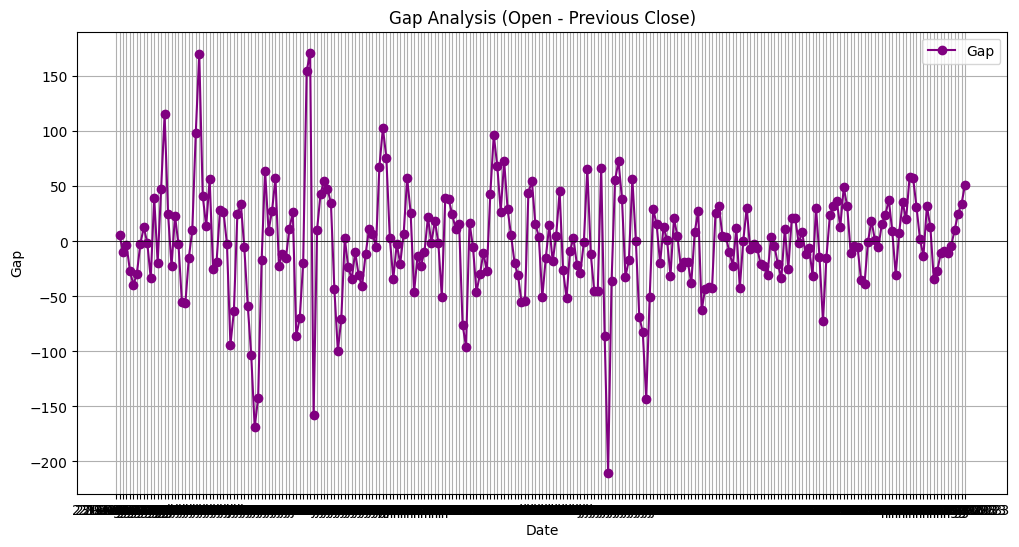

In [25]:
# Adding previous close column
data['Prev_Close'] = data['close '].shift(1)

# Calculate gap
data['Gap'] = data['OPEN '] - data['Prev_Close']

# Plotting gaps
plt.figure(figsize=(12, 6))
plt.plot(data['Date '], data['Gap'], marker='o', linestyle='-', color='purple', label='Gap')
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Gap Analysis (Open - Previous Close)')
plt.xlabel('Date')
plt.ylabel('Gap')
plt.grid(True)
plt.legend()
plt.show()


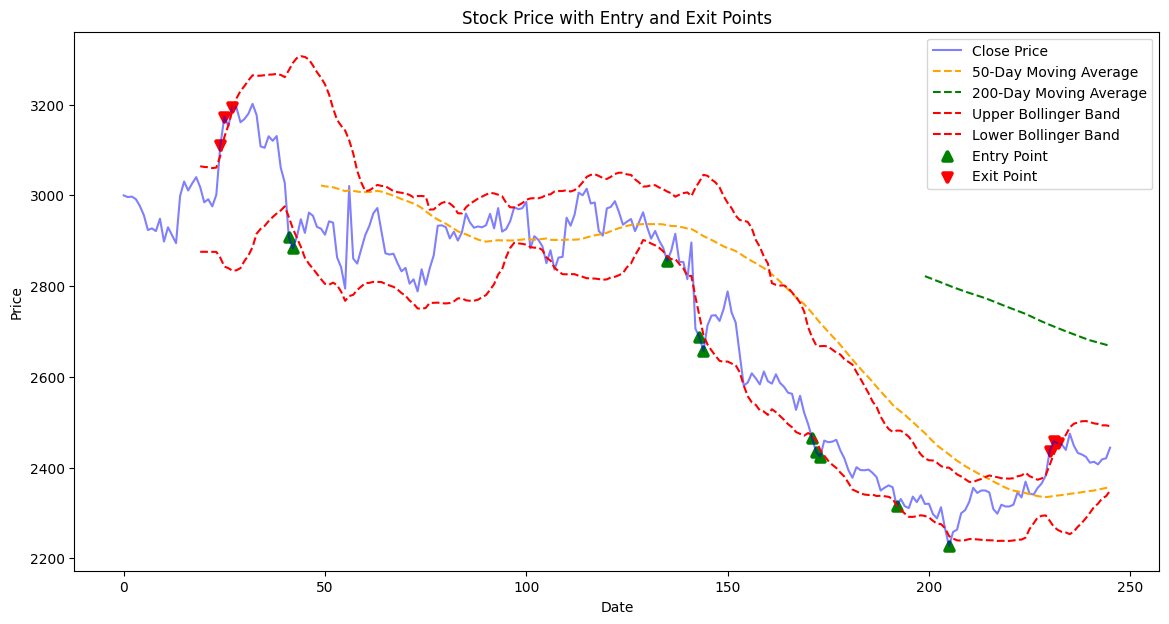

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('reliance.csv')

# Convert necessary columns to numeric
data['close '] = pd.to_numeric(data['close '].astype(str).str.replace(',', ''), errors='coerce')

# 1. Calculate Moving Averages (50-day and 200-day)
data['50_MA'] = data['close '].rolling(window=50).mean()
data['200_MA'] = data['close '].rolling(window=200).mean()

# 2. Calculate MACD
data['26_EMA'] = data['close '].ewm(span=26, adjust=False).mean()
data['12_EMA'] = data['close '].ewm(span=12, adjust=False).mean()
data['MACD'] = data['12_EMA'] - data['26_EMA']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# 3. Calculate RSI
delta = data['close '].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
average_gain = gain.rolling(window=14).mean()
average_loss = loss.rolling(window=14).mean()
rs = average_gain / average_loss
data['RSI'] = 100 - (100 / (1 + rs))

# 4. Calculate Bollinger Bands
data['20_MA'] = data['close '].rolling(window=20).mean()
data['stddev'] = data['close '].rolling(window=20).std()
data['Upper_Band'] = data['20_MA'] + (data['stddev'] * 2)
data['Lower_Band'] = data['20_MA'] - (data['stddev'] * 2)

# 5. Define Entry and Exit Points
# Entry when price is below lower band and RSI < 30
# Exit when price is above upper band and RSI > 70

entry_points = []
exit_points = []

for i in range(len(data)):
    if (data['close '].iloc[i] < data['Lower_Band'].iloc[i]) and (data['RSI'].iloc[i] < 30):
        entry_points.append(data['close '].iloc[i])
        exit_points.append(np.nan)
    elif (data['close '].iloc[i] > data['Upper_Band'].iloc[i]) and (data['RSI'].iloc[i] > 70):
        entry_points.append(np.nan)
        exit_points.append(data['close '].iloc[i])
    else:
        entry_points.append(np.nan)
        exit_points.append(np.nan)

data['Entry'] = entry_points
data['Exit'] = exit_points

# 6. Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data['close '], label='Close Price', color='blue', alpha=0.5)
plt.plot(data['50_MA'], label='50-Day Moving Average', color='orange', linestyle='--')
plt.plot(data['200_MA'], label='200-Day Moving Average', color='green', linestyle='--')
plt.plot(data['Upper_Band'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(data['Lower_Band'], label='Lower Bollinger Band', color='red', linestyle='--')

# Mark entry and exit points
plt.scatter(data.index, data['Entry'], label='Entry Point', marker='^', color='green', lw=3)
plt.scatter(data.index, data['Exit'], label='Exit Point', marker='v', color='red', lw=3)

plt.title('Stock Price with Entry and Exit Points')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
